In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy as dc
import numpy as np

In [62]:
import nltk
from nltk.corpus import stopwords

In [63]:
COARSE_LABEL = ["ABBR", "ENTY", "DESC", "HUM", "LOC", "NUM"]

In [64]:
train_df = pd.read_csv('../dataset/trec_train.csv')
test_df = pd.read_csv('../dataset/trec_test.csv')

In [65]:
train_df.head(3)

,text,coarse_label,fine_label
0,How did serfdom develop in and then leave Russ...,2,26
1,What films featured the character Popeye Doyle ?,1,5
2,How can I find a list of celebrities ' real na...,2,26


In [66]:
print(train_df.shape)
print(test_df.shape)

(5452, 3)
(500, 3)


In [67]:
def show_histogram(train_df, test_df):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    train_df['coarse_label'].hist()
    plt.title('Data Train')
    plt.xticks(ticks=range(len(train_df['coarse_label'].unique())), labels=[COARSE_LABEL[index] for index in np.sort(train_df['coarse_label'].unique())])
    
    plt.subplot(1, 2, 2)
    test_df['coarse_label'].hist()
    plt.title('Data Test')
    plt.xticks(ticks=range(len(test_df['coarse_label'].unique())), labels=[COARSE_LABEL[index] for index in np.sort(test_df['coarse_label'].unique())])
    plt.show()

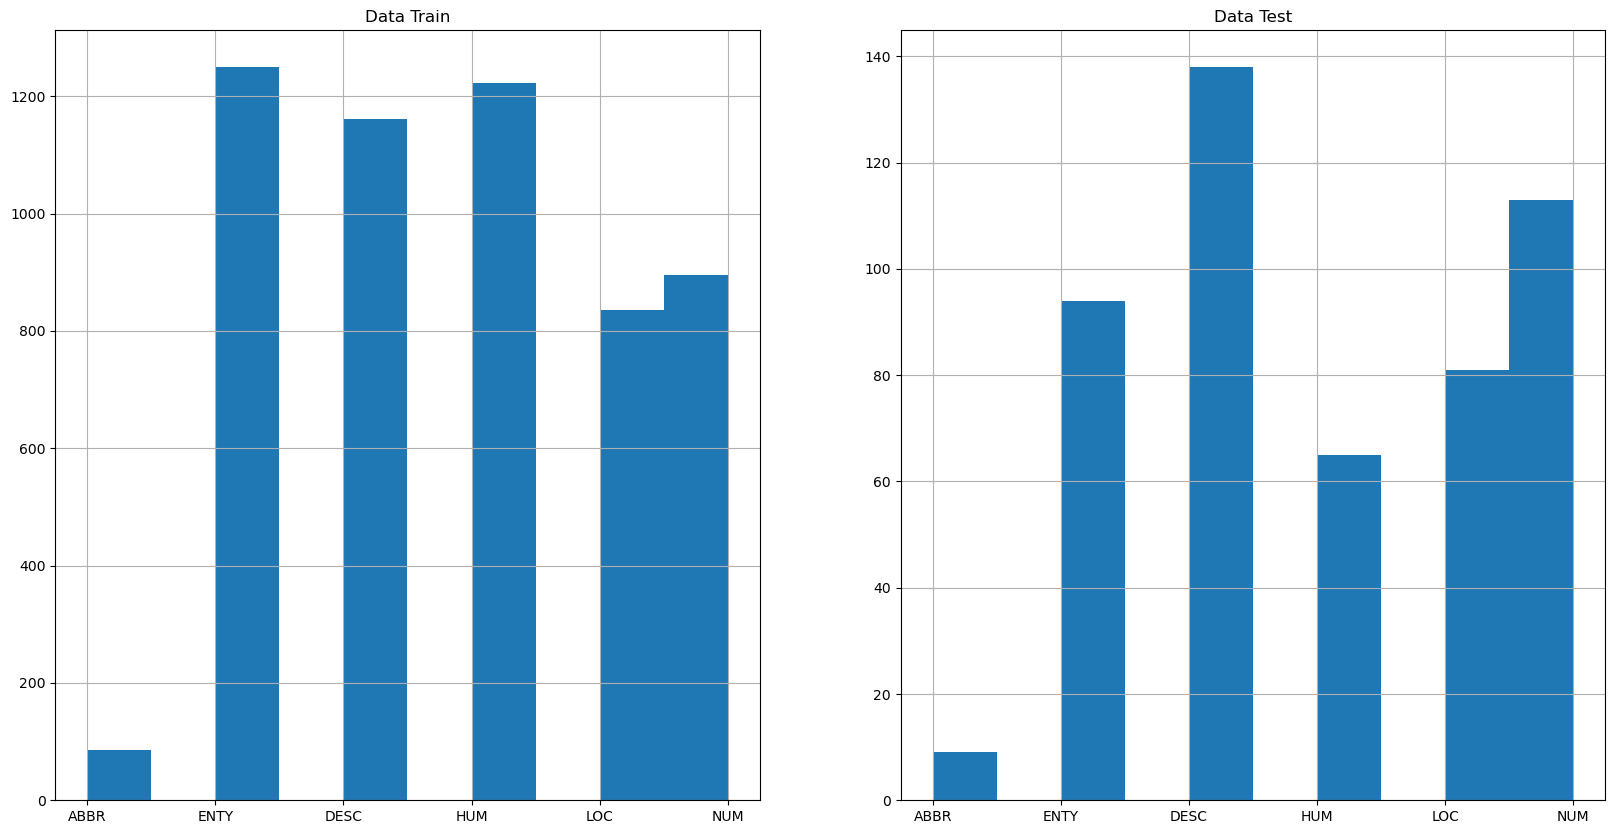

In [68]:
show_histogram(train_df, test_df)

# ABBVR (index 0) dihilangkan karena jumlahnya yang timpang dibandingkan dengan kategori lain dan tidak cukup urgen untuk dilakukan klasifikasi karena setiap negara dapat memiliki singkatan yang berbeda

In [69]:
train_df = train_df[train_df['coarse_label'] != 0]
test_df = test_df[test_df['coarse_label'] != 0]

train_df['coarse_label'] = train_df['coarse_label'].apply(lambda x: x-1)
test_df['coarse_label'] = test_df['coarse_label'].apply(lambda x: x-1)

COARSE_LABEL = ["ENTY", "DESC", "HUM", "LOC", "NUM"]

In [70]:
train_df.shape

(5366, 3)

In [71]:
test_df['coarse_label'].unique()

array([4, 3, 2, 1, 0])

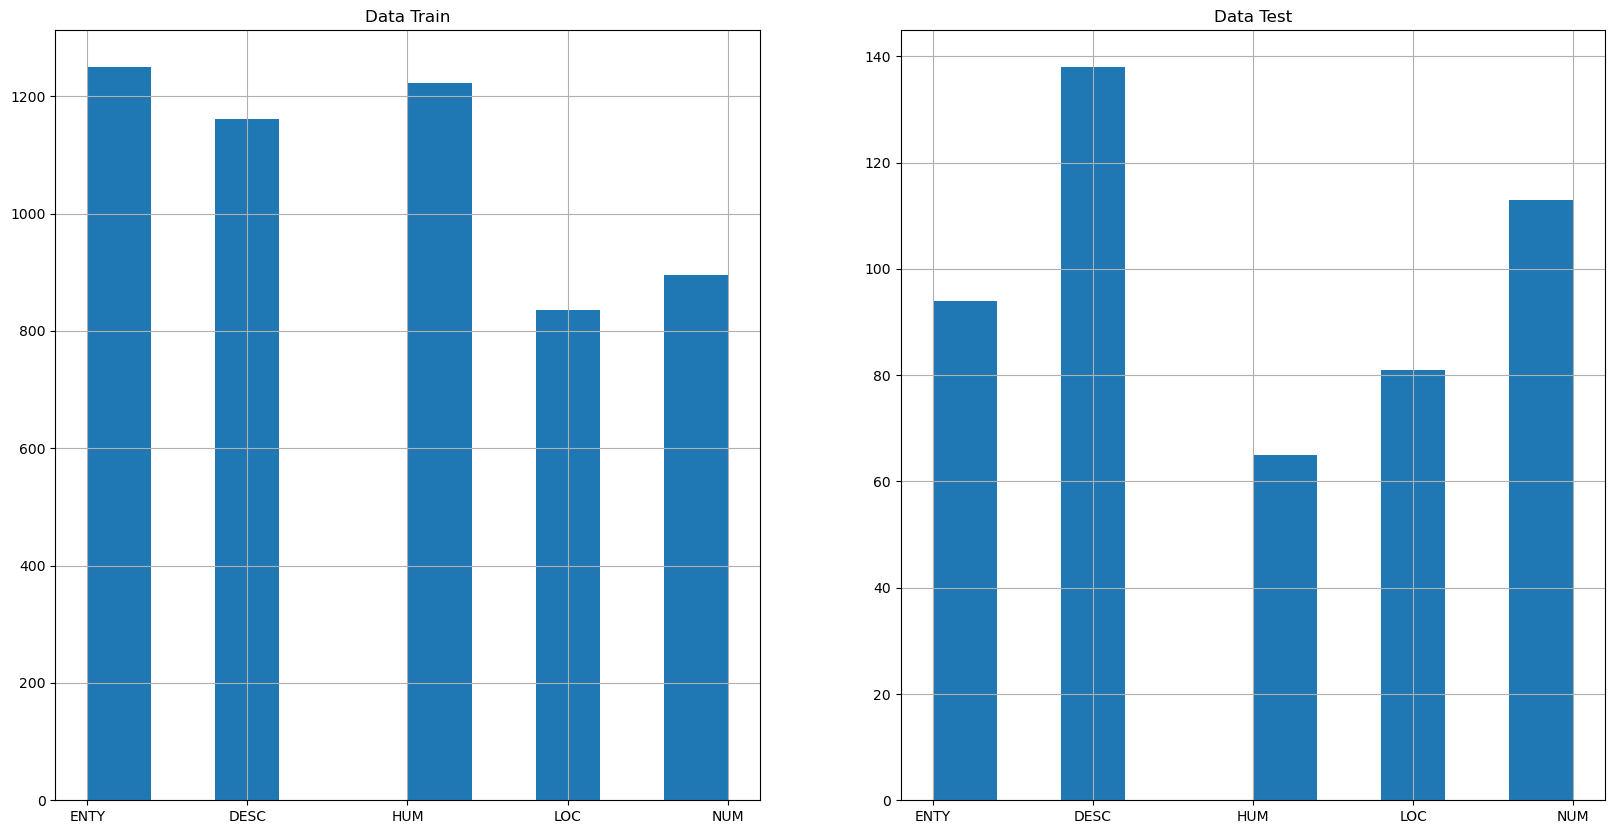

In [72]:
show_histogram(train_df, test_df)

# Word Cloud

In [12]:
from wordcloud import WordCloud

In [ ]:
stop = set(stopwords.words('english'))

train_text = " ".join([text.lower() for text in train_df['text']])
train_text

"how did serfdom develop in and then leave russia ? what films featured the character popeye doyle ? how can i find a list of celebrities ' real names ? what fowl grabs the spotlight after the chinese year of the monkey ? what contemptible scoundrel stole the cork from my lunch ? what team did baseball 's st. louis browns become ? what is the oldest profession ? what are liver enzymes ? name the scar-faced bounty hunter of the old west . when was ozzy osbourne born ? why do heavier objects travel downhill faster ? who was the pride of the yankees ? who killed gandhi ? what is considered the costliest disaster the insurance industry has ever faced ? what sprawling u.s. state boasts the most airports ? what did the only repealed amendment to the u.s. constitution deal with ? how many jews were executed in concentration camps during wwii ? what is `` nine inch nails '' ? what is an annotated bibliography ? what is the date of boxing day ? what articles of clothing are tokens in monopoly ?

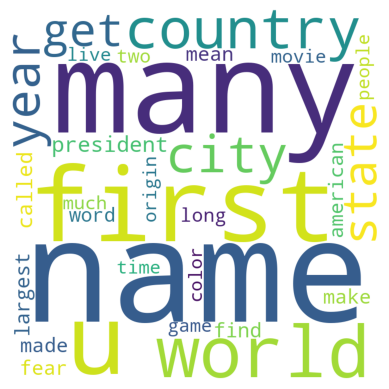

In [14]:
train_wc = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords=stop,
    max_words=30
).generate(train_text)
plt.axis('off')
plt.imshow(train_wc)
plt.show()

## Plot stopwords

In [15]:
def show_top_stopwords(df_column: pd.Series):
    corpus = []
    questions = df_column.str.split()
    questions = questions.values.tolist()
    corpus = [word for i in questions for word in i]

    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)
    plt.show()

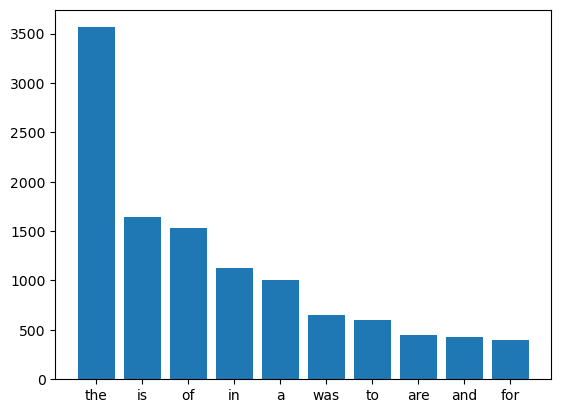

In [16]:
show_top_stopwords(train_df['text'])

## Plot kata non stopwords

In [17]:
def show_top_non_stopwords(df_series: pd.Series):
    from collections import Counter

    custom_stopwords = set(['?', "'s", ',', "``", "I", "l", "|", "''", '.'])
    
    questions = df_series.str.split()
    questions = questions.values.tolist()
    words = [word.lower() for i in questions for word in i]

    corpus = []
    for word in words:
        if word not in stop and word not in custom_stopwords:
            corpus.append(word)
    
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:15]:
        x.append(word)
        y.append(count)
    
    sns.barplot(x=y, y=x)

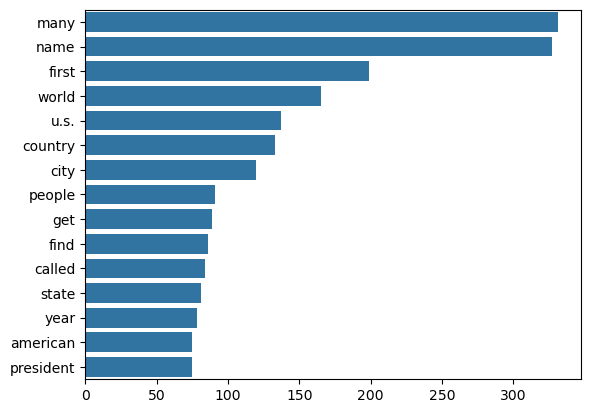

In [18]:
show_top_non_stopwords(train_df['text'])

# Apakah di pertanyaan kategori entity ada pertanyaan mengenai human?

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
train_df.style.set_properties(**{'text-align': 'left'})

entity_questions = train_df[train_df['coarse_label'] == 1]['text']

# combine all question with new line
entity_text = "\n\n".join([question for question in entity_questions])

# write to text
with open("entity_questions.txt", "w") as f:
    f.write(entity_text)

# Panjang rata-rata pertanyaan

<Axes: >

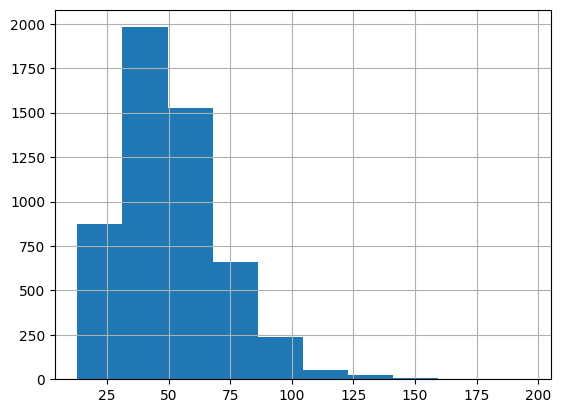

In [ ]:
# jumlah huruf
train_df['text'].str.len().hist()

## Distribusi panjang kata pada seluruh pertanyaan

<Axes: >

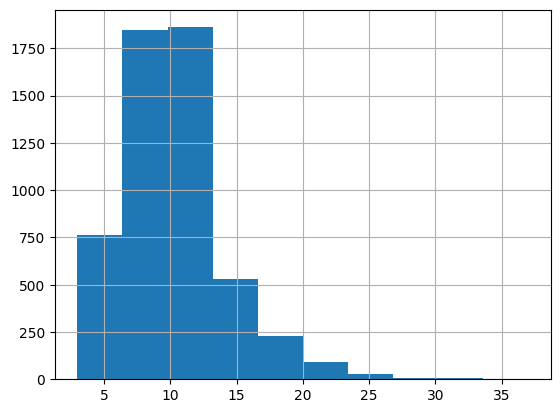

In [19]:
train_df['text'].str.split().map(lambda x: len(x)).hist()

Histogram menunjukkan rata-rata pertanyaan memiliki panjang 9 hingga 11 kata, dengan panjang paling kecil 5 kata dan paling panjang 30 kata

## Pertanyaan dengan panjang kata lebih dari 20

In [20]:
(train_df['text'].str.split().map(lambda x: len(x)) > 25).sum()

21

In [21]:
train_df[(train_df['text'].str.split().map(lambda x: len(x)) > 25)]

,text,coarse_label,fine_label
245,"How many people on the ground were killed from the bombing of Pan Am Flight 103 over Lockerbie , Scotland , December 21 , CD .",5,38
286,Who was the author of the book about computer hackers called `` The Cuckoo 's Egg : Tracking a Spy Through the Maze of Computer Espionage '' ?,3,29
694,"In what sport are these following numbers relevant : 118 , 126 , 134 , 142 , 15 , 158 , 167 , 177 , and 19 ?",1,17
712,What is the name of the chronic neurological autoimmune disease which attacks the protein sheath that surrounds nerve cells causing a gradual loss of movement in the body ?,1,7
737,"Who was named Admiral of the Ocean Seas and Viceroy and Governor General of all the islands he might discover , and also granted 10-?? of all profits of his voyage .",3,29
929,"Name the poet of the poem which begins : I do not know much about gods ; but I think that the river Is a strong brown god-sullen , and untamed ?",3,29
1120,"How much does it cost , average or whatever is available , to produce and send junk mail catalogues in the US ? , DT CD NN NN ,",5,41
1797,What French designer declared : `` The jean is the destructor ! It is a dictator ! It is destroying creativity. The jean must be stopped ! '' ?,3,29
2022,What Irwin Allen bomb has Richard Widmark saying he 'll be `` the first officer in history to get his butt kicked by a mess of bugs ! '' ?,1,5
2118,What enigmatic U.S. vice president was once tried and acquitted for treason in a plot to set up his own independent empire in the West ?,3,29


word cloud

skenario pengujian attention (apa parameter yang dituning)

cleaning yg data 0?

apakah di entity ada human?

saya menghilangkan abbr krna sangat tipang dan tidak cukup urgen utk dialukan klasifikasi dibanding kelas klainnya. karena setiap negara bisa punya abbvr berbeda

# Text Preprocessing

Beberapa data perlu diperbaiki

- How do you correctly say the word ` qigong ' ? 

Pada data di atas, penggunaan ` dan ' tidak diperlukan

- What does `` Janelle '' mean ?

Pada data di atas, penggunaan `` dan '' tidak diperlukan

- What 's an auberge in France ?

pada data di atas, kata 's diubah menjadi is

In [22]:
text = "What does `` Janelle '' mean ?"

split = text.split("`")
split

['What does ', '', " Janelle '' mean ?"]

# Stopwords Intervention

In [8]:
stop = set(stopwords.words('english'))
print('length before add new word:', len(stop))
# add 's and 't
stop.add("'s")
stop.add("'t")
print('length after add new word:', len(stop))

# exclude who and where since it used to classify human and location
stop.remove('who')
stop.remove('where')
print('length after exclude words:', len(stop))

length before add new word: 198
length after add new word: 200
length after exclude words: 198


In [ ]:
import model.text_preprocessor as text_preprocessor
stop = set(stopwords.words('english'))
preprocessor = text_preprocessor.TextPreprocessor(
    stopwords=stop
)

# example
texts = [
    "What 's the most common non-contagious disease in the world ?",
    "What does `` Janelle '' mean ?",
    "Pada data di atas, penggunaan ` dan ' tidak diperlukan",
    "Pada data di atas, penggunaan `` dan '' tidak diperlukan",
    "How do you correctly say the word ` qigong ' ?",
    "Who plays shortstop for Charlie Brown 's baseball team ?",
    "Where did the saying `` rule of thumb '' come from ?",
    '"What product doubles your pleasure , doubles your fun '' ?"'
]

cleaned_texts = [preprocessor.clean_text(t) for t in texts]

for original, cleaned in zip(texts, cleaned_texts):
    print(f"Original: {original}\nCleaned: {cleaned}\n")

Original: What 's the most common non-contagious disease in the world ?
Cleaned: common non-contagious disease world

Original: What does `` Janelle '' mean ?
Cleaned: janelle mean

Original: Pada data di atas, penggunaan ` dan ' tidak diperlukan
Cleaned: pada data di atas penggunaan dan tidak diperlukan

Original: Pada data di atas, penggunaan `` dan '' tidak diperlukan
Cleaned: pada data di atas penggunaan dan tidak diperlukan

Original: How do you correctly say the word ` qigong ' ?
Cleaned: correctly say word qigong

Original: Who plays shortstop for Charlie Brown 's baseball team ?
Cleaned: who plays shortstop charlie brown baseball team

Original: Where did the saying `` rule of thumb '' come from ?
Cleaned: where saying rule thumb come

Original: "What product doubles your pleasure , doubles your fun  ?"
Cleaned: product doubles pleasure doubles fun



In [ ]:
cleaned_train_df = dc(train_df)

cleaned_train_df['text'] = cleaned_train_df['text'].apply(lambda x: preprocessor.clean_text(x))

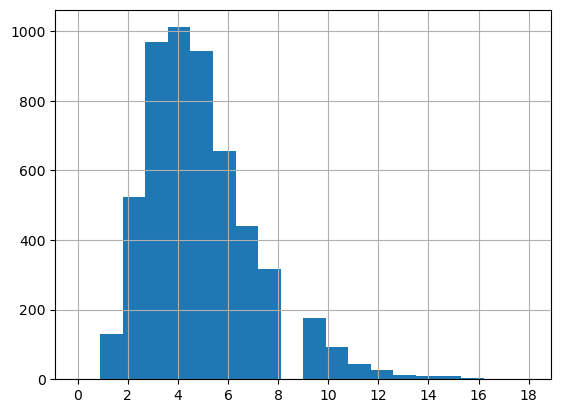

In [31]:
import matplotlib.ticker as ticker
ax = cleaned_train_df['text'].str.split().map(lambda x: len(x)).hist(bins=20)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

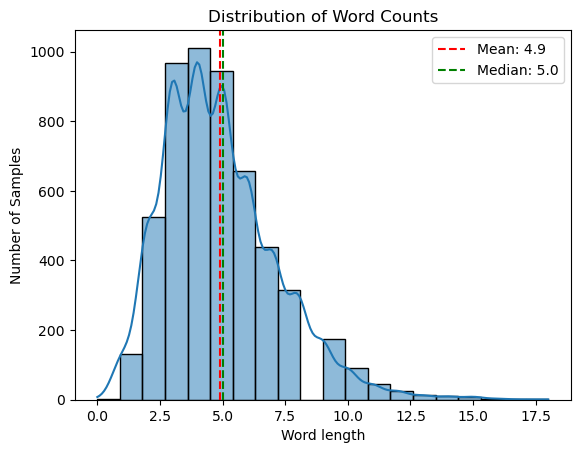

In [93]:
import numpy as np

word_counts = cleaned_train_df['text'].str.split().map(len)
mean = np.mean(word_counts)
median = np.median(word_counts)
sns.histplot(word_counts, bins=20, kde=True)
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.1f}')
plt.xlabel('Word length')
plt.ylabel('Number of Samples')
plt.title('Distribution of Word Counts')
plt.legend()
plt.show()

## Cleaned text with short words

In [78]:
print(
(cleaned_train_df['text'].str.split().map(len) == 0).sum(), 
(cleaned_train_df['text'].str.split().map(len) == 1).sum(),
(cleaned_train_df['text'].str.split().map(len) == 2).sum(),
(cleaned_train_df['text'].str.split().map(len) == 3).sum(),
(cleaned_train_df['text'].str.split().map(len) == 4).sum(),
(cleaned_train_df['text'].str.split().map(len) == 5).sum(),
)

2 131 524 968 1011 944


- There are 2 samples with empty text
- There are 131 samples with 1 word

# Get vocab from dataset

In [ ]:
all_text = [*train_df['text'].values, *test_df['text'].values]
print(f'all text length: {len(all_text)}')

vocab_with_stopwords = preprocessor.get_vocab_from_texts(all_text, use_stopwords=True)
vocab_without_stopwords = preprocessor.get_vocab_from_texts(all_text, use_stopwords=False)
print(f'vocab size with stopwords: {len(vocab_with_stopwords)}')
print(f'vocab size without stopwords: {len(vocab_without_stopwords)}')

all text length: 5857
vocab with stopwords length: 8766
vocab without stopwords length: 8896


In below code, i want to see what if i did not apply stopwords into train_df

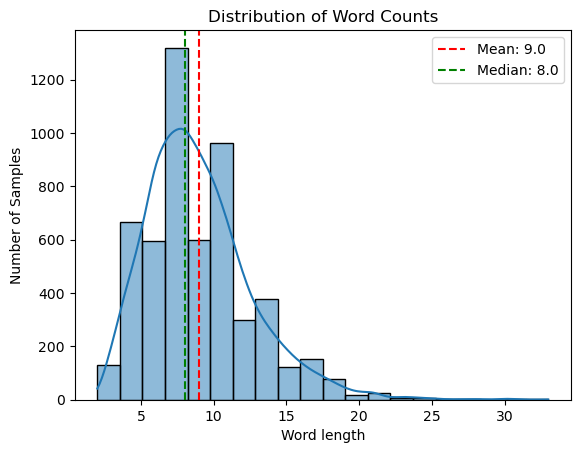

In [106]:
cleaned_without_stopwords = train_df['text'].apply(lambda x: preprocessor.clean_text(x, use_stopwords=False))

# visualize
word_counts = cleaned_without_stopwords.str.split().map(len)
mean = np.mean(word_counts)
median = np.median(word_counts)
sns.histplot(word_counts, bins=20, kde=True)
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.1f}')
plt.xlabel('Word length')
plt.ylabel('Number of Samples')
plt.title('Distribution of Word Counts')
plt.legend()
plt.show()

# Save the cleaned text to a new file

In [ ]:
# import csv
# from copy import deepcopy as dc

# cleaned_train_df = dc(train_df)

# # Apply text cleaning function
# cleaned_train_df['text'] = cleaned_train_df['text'].apply(clean_text)

# # Ensure no extra spaces before saving
# cleaned_train_df.to_csv('cleaned_trec_train.csv', index=False)

In [ ]:
# cleaned_test_df = dc(test_df)

# # Apply text cleaning function
# cleaned_test_df['text'] = cleaned_test_df['text'].apply(clean_text)

# # Ensure no extra spaces before saving
# cleaned_test_df.to_csv('cleaned_trec_test.csv', index=False)